In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(measurements).order_by(measurements.date.desc()).first()
print(most_recent.date)

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(last_year)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= last_year, measurements.prcp != None).\
    order_by(measurements.date).all()

In [12]:
#Load the query results into a Pandas DataFrame, and set the index to the date column.
precip_df = pd.DataFrame(year_prcp, columns=["date", 'prcp'])
precip_df.set_index('date', inplace=True)
precip_df = precip_df.sort_values('date')
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


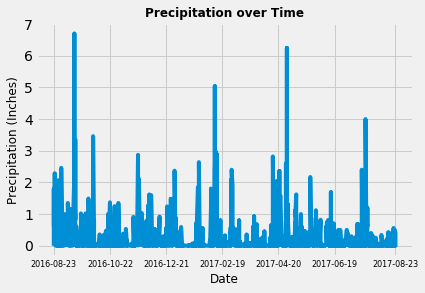

In [13]:
#Plot the data.
plt.plot(precip_df)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Precipitation (Inches)", fontsize = 12)
plt.xticks([0, 60, 120, 180, 240, 300, 365], size=8)
plt.title("Precipitation over Time", fontsize=12, fontweight="bold")
plt.savefig('Images/precipitation.png')
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(measurements.station).distinct().count()
total_stations

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurements.station,func.count(measurements.station)).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).\
    filter(measurements.station == 'USC00519281').order_by(func.min(measurements.tobs)).all()
most_active_stats

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year_temp = session.query(measurements.tobs).\
      filter(measurements.date >= last_year, measurements.station == 'USC00519281').\
      order_by(measurements.tobs).all()

In [19]:
active_temp_df = pd.DataFrame(active_year_temp, columns=['Tobs'])
active_temp_df.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


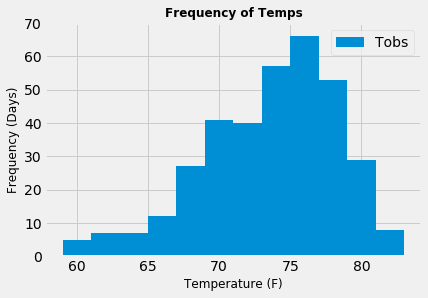

In [20]:
bins = 12
active_temp_df.plot.hist(active_year_temp,bins)
plt.xlabel("Temperature (F)", fontsize = 12)
plt.ylabel("Frequency (Days)", fontsize = 12)
plt.title("Frequency of Temps", fontsize=12, fontweight="bold")
plt.ylim(0,70)
plt.savefig('Images/station-histogram.png')

# Close session

In [21]:
# Close Session
session.close()